In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def RELU(x):
    ''' It returns zero if the input is less than zero otherwise it returns the given input. '''
    x1=[]
    for i in x:
        if i<0:
            x1.append(0)
        else:
            x1.append(i)

    return x1

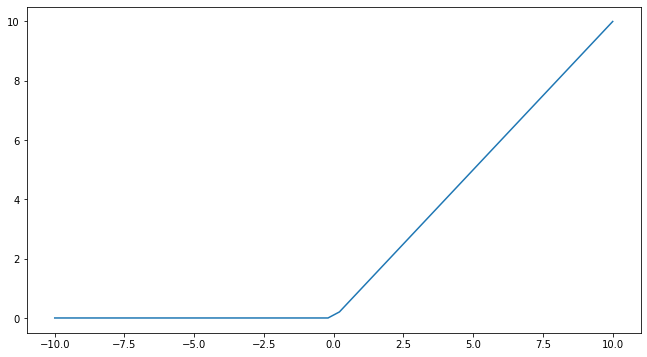

In [7]:
x = np.linspace(-10, 10)
fig, ax = plt.subplots(figsize=(11, 6))
plt.plot(x, RELU(x))
plt.axis('tight')
plt.show()

In [14]:
with open('resultados_consolidados.pickle', "rb") as handle:
    results = pickle.load(handle)

---

In [4]:
df_1_day = pd.DataFrame(results['decision_tree_regressor']['with_features']['1_day']['data'])
df_1_day.rename(columns={'predicted': 'decision_tree_regressor_with_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['decision_tree_regressor']['wo_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'decision_tree_regressor_wo_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['random_forest_regressor']['with_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'random_forest_regressor_with_features'}, inplace=True)
print(df_1_day.shape)

df_1_day = df_1_day.merge(
    pd.DataFrame(results['random_forest_regressor']['wo_features']['1_day']['data']),
    on=['ticker', 'date', 'close'],
    how='inner'
)
df_1_day.rename(columns={'predicted': 'random_forest_regressor_wo_features'}, inplace=True)
print(df_1_day.shape)

(90, 4)
(90, 5)
(90, 6)
(90, 7)


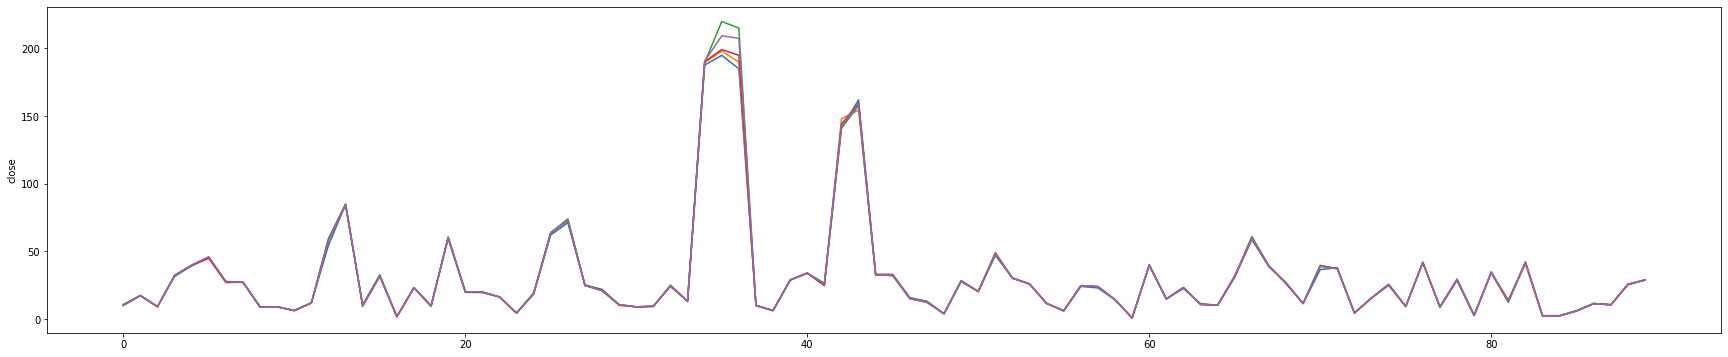

In [6]:
fig, ax = plt.subplots(figsize=(30, 6))

x = [_ for _ in range(len(df_1_day))]

sns.lineplot(data=df_1_day, x=x, y='close')
ax.plot(df_1_day['decision_tree_regressor_with_features'])
ax.plot(df_1_day['decision_tree_regressor_wo_features'])
ax.plot(df_1_day['random_forest_regressor_with_features'])
ax.plot(df_1_day['random_forest_regressor_wo_features'])

---

---

# PLOT TRAIN/TEST DATASET

In [2]:
df = pd.read_parquet('df_consolidado.parquet')

In [3]:
len(df[(df['date'] >= '2021-05-19') & (df['date'] <= '2021-06-28')]['date'].unique())

28

In [4]:
len(df[(df['date'] >= '2021-06-29') & (df['date'] <= '2021-08-06')]['date'].unique())

28

In [5]:
df_train_test = df[['ticker','close', 'date']].copy()
df_train_test['date'] = df_train_test['date'].dt.strftime('%Y-%m-%d')
df_train_test = df_train_test.sort_values(by='date')
df_train_test = df_train_test.reset_index()
df_train_test.drop(columns='index', inplace=True)

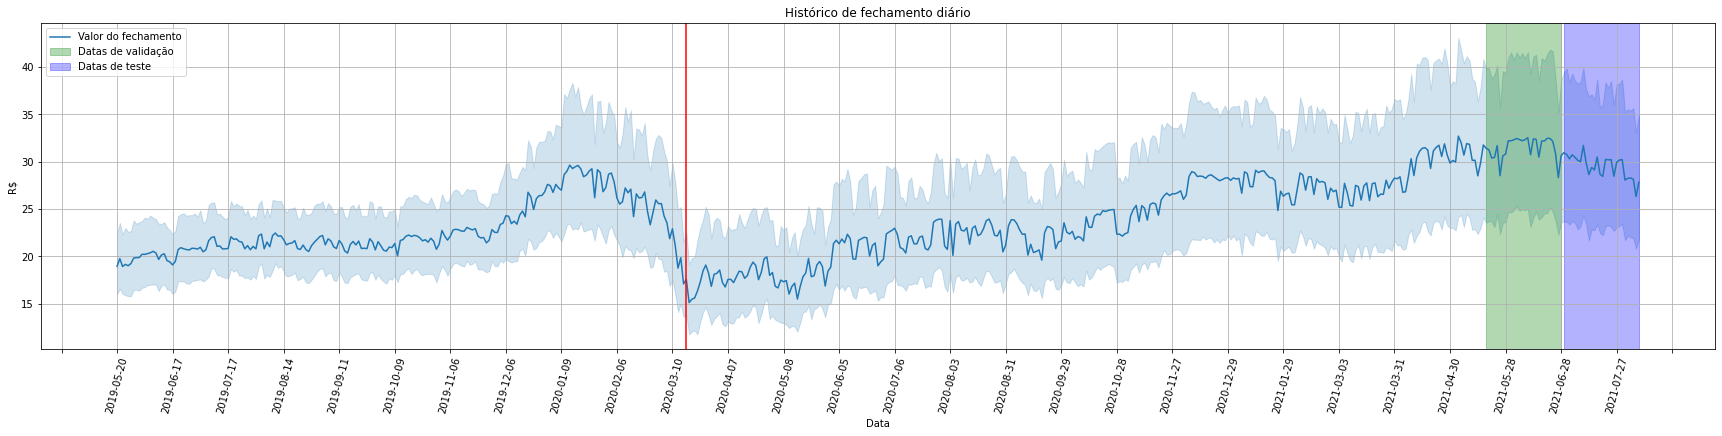

In [6]:
fig, ax = plt.subplots(figsize=(30, 6))

ax.grid(True)
sns.lineplot(
    x=df_train_test['date'], 
    y=df_train_test['close'], 
    label='Valor do fechamento'
)
ax.axvline(205,0,1, color='r')

ax.axvspan(
    list(df_train_test['date'].unique()).index('2021-05-19'),
    list(df_train_test['date'].unique()).index('2021-06-28'),
    alpha=0.3,
    color='green',
    label='Datas de validação')

ax.axvspan(
    list(df_train_test['date'].unique()).index('2021-06-29'),
    list(df_train_test['date'].unique()).index('2021-08-06'),
    alpha=0.3,
    color='blue',
    label='Datas de teste')

ax.xaxis.set_major_locator(plt.MaxNLocator(40))
plt.xticks(rotation=75)
plt.ylabel('R$')
plt.xlabel('Data')
plt.title('Histórico de fechamento diário')
plt.legend()